In [3]:
import pandas as pd

D:\ANACONDA\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
# read the file
ETFPrice = pd.read_csv('adjusted_ETFPrice.csv')
sentiment = pd.read_csv('Desktop/sentiment.csv')
ETFPrice = ETFPrice.drop(ETFPrice.index[0:1694])
ETFPrice['Date'] = pd.to_datetime(ETFPrice['Date'])
ETFPrice.set_index('Date', inplace=True)
ETFPrice = ETFPrice.drop('Unnamed: 0',axis=1)
ETFPrice

,Open,High,Low,Close,Volumn
Date,,,,,
2023-06-13,29.121,29.321,28.892,29.241,2639924.0
2023-06-14,29.281,29.451,28.972,29.361,1746741.0
2023-06-15,29.271,29.760,29.121,29.660,2239086.0
2023-06-16,29.930,29.940,29.510,29.530,1784844.0
2023-06-20,29.391,29.391,28.972,29.221,1722810.0
...,...,...,...,...,...
2024-04-22,28.980,29.240,28.750,29.110,698499.0
2024-04-23,29.160,29.710,29.160,29.640,465590.0
2024-04-24,29.820,29.910,29.404,29.560,675028.0


In [5]:
sentiment['Date'] = pd.to_datetime(sentiment['Date'])
sentiment.set_index('Date', inplace=True)

In [6]:
sentiment

,neg,neu,pos,sentiment
Date,,,,
2023-06-13,0.000000,1.000000,0.000000,0.000000
2023-06-14,0.000000,1.000000,0.000000,0.000000
2023-06-15,0.000000,0.936250,0.063750,0.085000
2023-06-16,0.000000,0.906750,0.093250,0.286300
2023-06-19,0.000000,0.832000,0.168000,0.363450
...,...,...,...,...
2024-04-22,0.048911,0.881571,0.069512,0.046224
2024-04-23,0.069135,0.846712,0.084131,0.040057
2024-04-24,0.046750,0.873211,0.080047,0.071079


In [7]:
# Merge
PriceswithEmotion = ETFPrice.join(sentiment,how='outer')
PriceswithEmotion = PriceswithEmotion.dropna(subset=['Open'])
PriceswithEmotion

,Open,High,Low,Close,Volumn,neg,neu,pos,sentiment
Date,,,,,,,,,
2023-06-13,29.121,29.321,28.892,29.241,2639924.0,0.000000,1.000000,0.000000,0.000000
2023-06-14,29.281,29.451,28.972,29.361,1746741.0,0.000000,1.000000,0.000000,0.000000
2023-06-15,29.271,29.760,29.121,29.660,2239086.0,0.000000,0.936250,0.063750,0.085000
2023-06-16,29.930,29.940,29.510,29.530,1784844.0,0.000000,0.906750,0.093250,0.286300
2023-06-20,29.391,29.391,28.972,29.221,1722810.0,0.000000,0.741000,0.259000,0.598300
...,...,...,...,...,...,...,...,...,...
2024-04-22,28.980,29.240,28.750,29.110,698499.0,0.048911,0.881571,0.069512,0.046224
2024-04-23,29.160,29.710,29.160,29.640,465590.0,0.069135,0.846712,0.084131,0.040057
2024-04-24,29.820,29.910,29.404,29.560,675028.0,0.046750,0.873211,0.080047,0.071079


In [8]:
# Save
PriceswithEmotion.to_csv('Prices_with_Emotion.csv')

D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


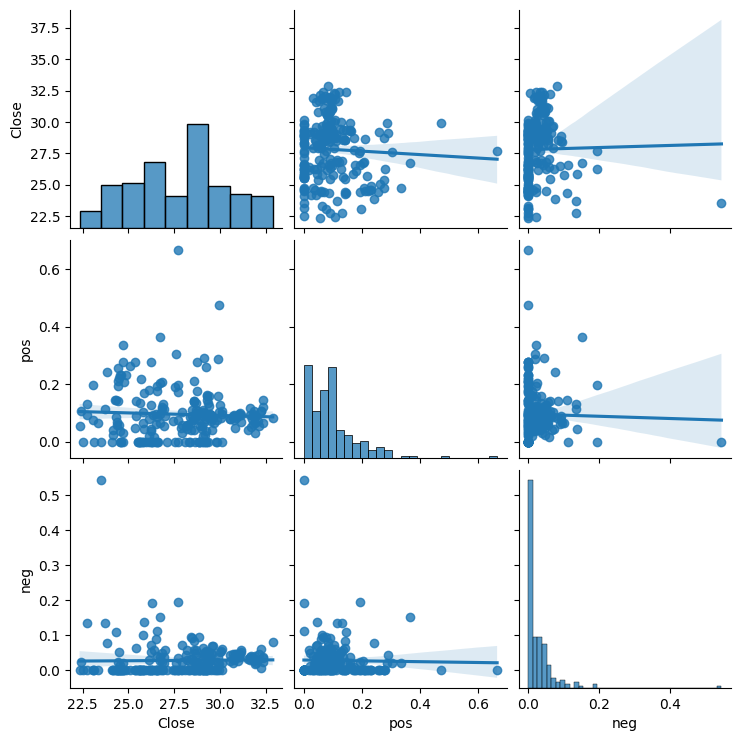

In [9]:
import seaborn
# Parameters:
# data: pandas.DataFrame [Tidy (long-form) dataframe where each column is a variable and each row is an observation.]
# diag_kind: {‘auto’, ‘hist’, ‘kde’, None} [Kind of plot for the diagonal subplots.]
# kind: {‘scatter’, ‘kde’, ‘hist’, ‘reg’} [Kind of plot to make.]
fig1 = seaborn.pairplot(PriceswithEmotion[['Close', 'pos','neg']], diag_kind='hist', kind='reg')
# save the fig1 to ig1_a_Grid_of_Axes
fig1.savefig('fig1_a_Grid_of_Axes.png')